# Day-36(25June) 
## EDA Automation with ollama and Gradio

In [1]:
pip install gradio ollama

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv(r"C:\Users\sande\Downloads\titanic_ dataset_final.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Missing value checks
print(f"Missing Values\n{df.isnull().sum()}")

Missing Values
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Text(0.5, 1.0, 'Survival Count')

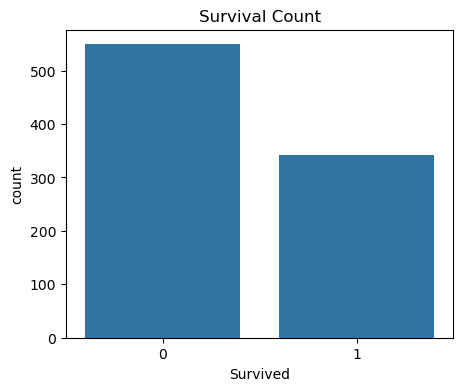

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(x="Survived",data=df)
plt.title("Survival Count")

In [8]:
import ollama

In [9]:
def generate_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(
        model="mistral",
        messages=[{"role": "user", "content": prompt}]
    )
    return response['message']['content']  

summary = df.describe().to_string()
insights = generate_insights(summary)

print("\n AI-Generated Insights:\n", insights)


 AI-Generated Insights:
  The dataset summary provides a statistical overview of the Titanic passenger data. Here are some insights based on the summary:

1. **Count**: Each column contains data for 891 passengers, as the Titanic had approximately 2224 passengers and crew members on board.

2. **Mean**: The average value of each column is as follows:
   - PassengerId: Not applicable as it's an identifier and not numeric.
   - Survived: The average passenger did not survive (0.383838 out of 1).
   - Pclass: The passengers were mainly from the Second Class (2.308642).
   - Age: The average age was 29.69 years.
   - SibSp: On average, each passenger had a sibling or an infant accompanying them about half of the time (0.523 times).
   - Parch: On average, each passenger had no parents or other adult accompanying them (0.3816 times).
   - Fare: The average fare was around 32.2042 dollars.

3. **Standard Deviation**: This gives an idea of the spread or dispersion of the data in each column.

In [10]:
import gradio as gr
def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights=generate_insights(summary)
    return insights
demo=gr.Interface(fn=eda_analysis,inputs="file",outputs="text",title="AI-Powered EDA with Mistral")

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


In [15]:
df.describe().to_string()

'       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare\ncount   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000\nmean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208\nstd     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429\nmin       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000\n25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400\n50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200\n75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000\nmax     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200'